## visualisasi hasil training

In [4]:
import pandas as pd

df = pd.read_csv("runs/detect/train18_multi_e50_bs1/results.csv")

df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.13700,4.1510,1.4139,0.00025,0.03125,0.00050,0.00035,0.99863,4.0751,1.4579,0.075025,0.000025,0.000025
1,2,1.02290,4.0722,1.3135,0.00025,0.03125,0.00050,0.00035,0.99863,4.0751,1.4579,0.049050,0.000050,0.000050
2,3,1.13990,4.0351,1.4299,0.01722,0.21875,0.01913,0.01495,0.83907,3.9514,1.2986,0.023074,0.000074,0.000074
3,4,0.98010,4.0492,1.2853,0.01722,0.21875,0.01913,0.01495,0.83907,3.9514,1.2986,0.000094,0.000094,0.000094
4,5,1.05730,3.9664,1.3606,0.02014,0.29688,0.06141,0.03480,0.86472,3.8930,1.3031,0.000092,0.000092,0.000092
5,6,1.01920,4.0128,1.3103,0.02014,0.29688,0.06141,0.03480,0.86472,3.8930,1.3031,0.000090,0.000090,0.000090
6,7,1.01640,4.0064,1.3146,0.02014,0.29688,0.06141,0.03480,0.86472,3.8930,1.3031,0.000088,0.000088,0.000088
7,8,0.98816,4.0379,1.2876,0.02629,0.34375,0.05844,0.03930,0.86971,3.8047,1.3020,0.000086,0.000086,0.000086
8,9,0.91117,3.9270,1.2512,0.02629,0.34375,0.05844,0.03930,0.86971,3.8047,1.3020,0.000084,0.000084,0.000084
9,10,0.98456,3.9561,1.2837,0.02158,0.29688,0.05617,0.03745,0.85167,3.8172,1.2835,0.000082,0.000082,0.000082


## melihat kecocokan bounding box dan gambar

In [2]:
import cv2

def draw_bounding_boxes(image_path, annotation_path, scale=0.5):
    # Baca gambar
    img = cv2.imread(image_path)

    # Dapatkan dimensi gambar asli
    original_height, original_width, _ = img.shape

    # Resize gambar dengan skala yang lebih kecil
    img = cv2.resize(img, (int(original_width * scale), int(original_height * scale)))

    # Dapatkan dimensi gambar setelah resize
    height, width, _ = img.shape

    # Baca file anotasi
    with open(annotation_path, "r") as f:
        lines = f.readlines()

    # Loop melalui setiap baris di file anotasi
    for line in lines:
        # Pecah baris menjadi informasi yang berguna
        class_id, x_center, y_center, w, h = map(float, line.split())

        # Denormalisasi koordinat bounding box ke ukuran gambar
        x_center *= width
        y_center *= height
        w *= width
        h *= height

        # Hitung koordinat bounding box
        x1 = int(x_center - w / 2)
        y1 = int(y_center - h / 2)
        x2 = int(x_center + w / 2)
        y2 = int(y_center + h / 2)

        # Gambar bounding box di gambar
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Tampilkan class_id di sebelah bounding box
        cv2.putText(img, f"Class {int(class_id)}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Tampilkan gambar dengan ukuran jendela yang bisa diubah
    cv2.namedWindow("Annotated Image", cv2.WINDOW_NORMAL)  # Membuat jendela yang dapat diubah ukurannya
    cv2.imshow("Annotated Image", img)

    # Sesuaikan ukuran jendela dengan gambar
    cv2.resizeWindow("Annotated Image", width, height)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Contoh pemanggilan fungsi
image_path = "multicontainer/test/images/IMG_20240909_151504_jpg.rf.7220f87289f16c195c2e3d714b52283c.jpg"
annotation_path = "multicontainer/test/labels/IMG_20240909_151504_jpg.rf.7220f87289f16c195c2e3d714b52283c.txt"
# image_path = "datasets/campur/valid/images/IMG_20240830_173232_jpg.rf.d0205c99a9bd006b52cce1e9c9c3209a.jpg"
# annotation_path = "datasets/campur/valid/labels/IMG_20240830_173232_jpg.rf.d0205c99a9bd006b52cce1e9c9c3209a.txt"
draw_bounding_boxes(image_path, annotation_path, scale=0.5)


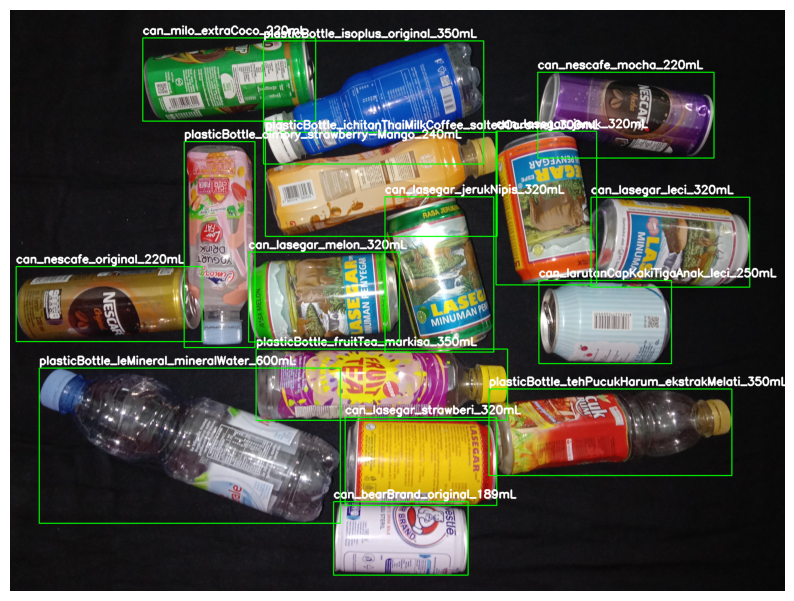

In [9]:
import cv2
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, annotation_path, scale=0.5):
    # Definisikan label untuk kelas
    class_labels = {
        0: "Cans",
        1: "can_bearBrand_original_189mL",
        2: "can_larutanCapKakiTigaAnak_leci_250mL",
        3: "can_lasegar_jerukNipis_320mL",
        4: "can_lasegar_jeruk_320mL",
        5: "can_lasegar_leci_320mL",
        6: "can_lasegar_melon_320mL",
        7: "can_lasegar_strawberi_320mL",
        8: "can_milo_extraCoco_220mL",
        9: "can_nescafe_mocha_220mL",
        10: "can_nescafe_original_220mL",
        11: "plasticBottle_cimory_strawberry-Mango_240mL",
        12: "plasticBottle_fruitTea_markisa_350mL",
        13: "plasticBottle_ichitanThaiMilkCoffee_saltedCaramel_300mL",
        14: "plasticBottle_isoplus_original_350mL",
        15: "plasticBottle_leMineral_mineralWater_600mL",
        16: "plasticBottle_tehPucukHarum_ekstrakMelati_350mL"
    }

    # Baca gambar
    img = cv2.imread(image_path)

    # Dapatkan dimensi gambar asli
    original_height, original_width, _ = img.shape

    # Resize gambar dengan skala yang lebih kecil
    img = cv2.resize(img, (int(original_width * scale), int(original_height * scale)))

    # Dapatkan dimensi gambar setelah resize
    height, width, _ = img.shape

    # Baca file anotasi
    with open(annotation_path, "r") as f:
        lines = f.readlines()

    # Loop melalui setiap baris di file anotasi
    for line in lines:
        # Pecah baris menjadi informasi yang berguna
        class_id, x_center, y_center, w, h = map(float, line.split())

        # Denormalisasi koordinat bounding box ke ukuran gambar
        x_center *= width
        y_center *= height
        w *= width
        h *= height

        # Hitung koordinat bounding box
        x1 = int(x_center - w / 2)
        y1 = int(y_center - h / 2)
        x2 = int(x_center + w / 2)
        y2 = int(y_center + h / 2)

        # Gambar bounding box di gambar
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Ambil label dari class_id
        label = class_labels.get(int(class_id), "Unknown")

        # Tampilkan label di sebelah bounding box
        cv2.putText(img, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255,255), 3)

    # Konversi gambar BGR ke RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar menggunakan matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Tidak menampilkan sumbu
    plt.show()

# Contoh pemanggilan fungsi
image_path = "multicontainer/test/images/IMG_20240909_151504_jpg.rf.7220f87289f16c195c2e3d714b52283c.jpg"
annotation_path = "multicontainer/test/labels/IMG_20240909_151504_jpg.rf.7220f87289f16c195c2e3d714b52283c.txt"
draw_bounding_boxes(image_path, annotation_path, scale=0.5)


In [26]:
import os
import cv2

def draw_bounding_boxes(image_path, annotation_path, scale=0.5):
    # Baca gambar
    img = cv2.imread(image_path)

    # Dapatkan dimensi gambar asli
    original_height, original_width, _ = img.shape

    # Resize gambar dengan skala yang lebih kecil
    img = cv2.resize(img, (int(original_width * scale), int(original_height * scale)))

    # Dapatkan dimensi gambar setelah resize
    height, width, _ = img.shape

    # Baca file anotasi
    with open(annotation_path, "r") as f:
        lines = f.readlines()

    # Loop melalui setiap baris di file anotasi
    for line in lines:
        # Pecah baris menjadi informasi yang berguna
        class_id, x_center, y_center, w, h = map(float, line.split())

        # Denormalisasi koordinat bounding box ke ukuran gambar
        x_center *= width
        y_center *= height
        w *= width
        h *= height

        # Hitung koordinat bounding box
        x1 = int(x_center - w / 2)
        y1 = int(y_center - h / 2)
        x2 = int(x_center + w / 2)
        y2 = int(y_center + h / 2)

        # Gambar bounding box di gambar
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Tampilkan class_id di sebelah bounding box
        cv2.putText(img, f"Class {int(class_id)}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Tampilkan gambar dengan ukuran jendela yang bisa diubah
    cv2.namedWindow("Annotated Image", cv2.WINDOW_NORMAL)  # Membuat jendela yang dapat diubah ukurannya
    cv2.imshow("Annotated Image", img)

    # Sesuaikan ukuran jendela dengan gambar
    cv2.resizeWindow("Annotated Image", width, height)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


def check_images_and_labels(image_folder, label_folder, scale=0.5):
    # Dapatkan semua file gambar di folder
    image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg") or f.endswith(".png")]

    for image_file in image_files:
        # Tentukan path gambar dan file label
        image_path = os.path.join(image_folder, image_file)
        label_file = os.path.splitext(image_file)[0] + ".txt"  # Ubah ekstensi ke .txt
        annotation_path = os.path.join(label_folder, label_file)

        # Cek apakah file anotasi ada
        if os.path.exists(annotation_path):
            print(f"Processing {image_file} with label {label_file}")
            draw_bounding_boxes(image_path, annotation_path, scale)
        else:
            print(f"Label for {image_file} not found. Skipping...")


# Contoh pemanggilan fungsi
image_folder = "datasets/campur/train/images"
label_folder = "datasets/campur/train/labels"
check_images_and_labels(image_folder, label_folder, scale=0.5)


Processing IMG_20240830_165345_jpg.rf.61fe588058a3bec4c8c6378d2c7bfdc1.jpg with label IMG_20240830_165345_jpg.rf.61fe588058a3bec4c8c6378d2c7bfdc1.txt
Processing IMG_20240830_165356_jpg.rf.b8b9d3f54d7a8b530d822da10ab837fa.jpg with label IMG_20240830_165356_jpg.rf.b8b9d3f54d7a8b530d822da10ab837fa.txt
Processing IMG_20240830_165511_jpg.rf.0c87545e4603cc5be89cb5e96ba37e97.jpg with label IMG_20240830_165511_jpg.rf.0c87545e4603cc5be89cb5e96ba37e97.txt
Processing IMG_20240830_165949_jpg.rf.66ee6aae5fc1370813aa0072d09bd4c2.jpg with label IMG_20240830_165949_jpg.rf.66ee6aae5fc1370813aa0072d09bd4c2.txt
Processing IMG_20240830_165955_jpg.rf.b3b99a2b66ae9b84db05edd8076e687b.jpg with label IMG_20240830_165955_jpg.rf.b3b99a2b66ae9b84db05edd8076e687b.txt
Processing IMG_20240830_165959_jpg.rf.011404a742927b170bdaada64e416c83.jpg with label IMG_20240830_165959_jpg.rf.011404a742927b170bdaada64e416c83.txt
Processing IMG_20240830_170002_jpg.rf.b9ca993dd8ba7732d628a55f03dcf2b1.jpg with label IMG_20240830_1

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load a pretrained YOLOv8n model
model = YOLO("runs/detect/train16_singgle_100/weights/best.pt")

# Define path to the image file
source = "datasets/test/images/IMG_20240830_175224_jpg.rf.9b99365f1b309acc3a4ea3c67c7bbcb0.jpg"

# Run inference on the source
result = model(source)  # list of Results objects

# Get the image with bounding boxes using the plot method
image_with_boxes = result[0].plot()

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 8))

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()



## inference using single container model


image 1/1 d:\Internship\RecycloRobo.ai\indonesia_baverage\datasets\test\images\IMG_20240830_171226_jpg.rf.0fc3ad5add8d21b0b2fd2c49fb9dd3d3.jpg: 640x384 (no detections), 44.7ms
Speed: 2.0ms preprocess, 44.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)


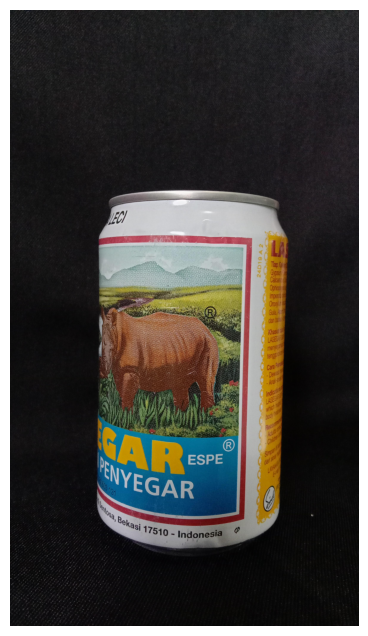

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load a pretrained YOLOv8n model
model = YOLO("runs/detect/train22/weights/best.pt")

# Define path to the image file
source = "datasets/test/images/IMG_20240830_171226_jpg.rf.0fc3ad5add8d21b0b2fd2c49fb9dd3d3.jpg"

# Run inference on the source
result = model(source)  # list of Results objects

# Get the image with bounding boxes using the plot method
image_with_boxes = result[0].plot()

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 8))

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()




image 1/1 d:\Internship\RecycloRobo.ai\indonesia_baverage\multicontainer\test\images\IMG_20240909_151504_jpg.rf.7220f87289f16c195c2e3d714b52283c.jpg: 480x640 1 can_bearBrand_original_189mL, 1 can_larutanCapKakiTigaAnak_leci_250mL, 1 can_lasegar_jerukNipis_320mL, 1 can_lasegar_jeruk_320mL, 1 can_lasegar_leci_320mL, 1 can_lasegar_melon_320mL, 2 can_lasegar_strawberi_320mLs, 1 can_milo_extraCoco_220mL, 1 can_nescafe_mocha_220mL, 1 can_nescafe_original_220mL, 1 plasticBottle_cimory_strawberry-Mango_240mL, 1 plasticBottle_fruitTea_markisa_350mL, 1 plasticBottle_ichitanThaiMilkCoffee_saltedCaramel_300mL, 1 plasticBottle_isoplus_original_350mL, 1 plasticBottle_leMineral_mineralWater_600mL, 1 plasticBottle_tehPucukHarum_ekstrakMelati_350mL, 143.4ms
Speed: 31.2ms preprocess, 143.4ms inference, 943.3ms postprocess per image at shape (1, 3, 480, 640)


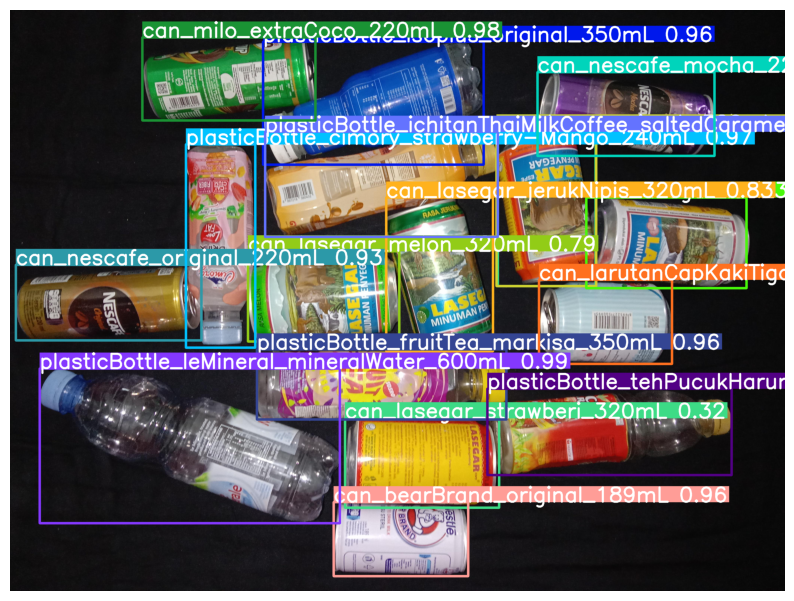

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load a pretrained YOLOv8n model
model = YOLO("runs/detect/train28/weights/best.pt")

# Define path to the image file
source = "multicontainer/test/images/IMG_20240909_151504_jpg.rf.7220f87289f16c195c2e3d714b52283c.jpg"

# Run inference on the source
result = model(source)  # list of Results objects

# Get the image with bounding boxes using the plot method
image_with_boxes = result[0].plot()

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 25))

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()




image 1/1 d:\Internship\RecycloRobo.ai\indonesia_baverage\multicontainer\train\images\IMG_20240909_105927_jpg.rf.d29bcfefcd8b6363e6ae00097132a532.jpg: 480x640 2 can_bearBrand_original_189mLs, 2 can_larutanCapKakiTigaAnak_leci_250mLs, 2 can_lasegar_jeruk_320mLs, 2 can_lasegar_leci_320mLs, 1 can_lasegar_strawberi_320mL, 1 can_nescafe_mocha_220mL, 1 can_nescafe_original_220mL, 1 plasticBottle_cimory_strawberry-Mango_240mL, 1 plasticBottle_fruitTea_markisa_350mL, 1 plasticBottle_ichitanThaiMilkCoffee_saltedCaramel_300mL, 1 plasticBottle_isoplus_original_350mL, 1 plasticBottle_leMineral_mineralWater_600mL, 1 plasticBottle_tehPucukHarum_ekstrakMelati_350mL, 31.7ms
Speed: 0.0ms preprocess, 31.7ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


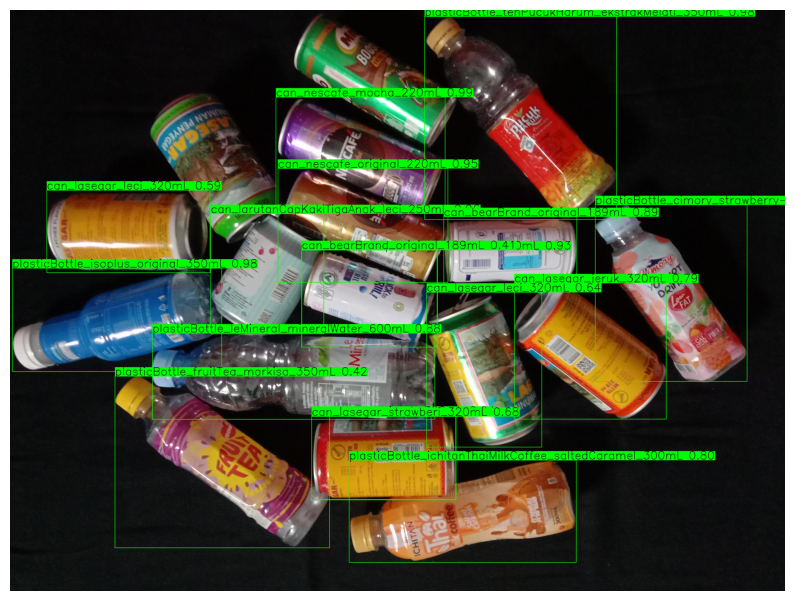

In [55]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load a pretrained YOLOv8n model
model = YOLO("runs/detect/train27/weights/best.pt")

# Define path to the image file
source = "multicontainer/train/images/IMG_20240909_105927_jpg.rf.d29bcfefcd8b6363e6ae00097132a532.jpg"

# Run inference on the source
result = model(source)  # list of Results objects

# Extract the image and results
image = cv2.imread(source)

# Loop through each detection
for box in result[0].boxes:
    # Extract bounding box coordinates and label
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get the box coordinates
    label = f"{model.names[int(box.cls[0])]} {box.conf[0]:.2f}"  # Label with confidence score

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Set the custom font scale for smaller text
    font_scale = 2
    font_thickness = 2

    # Get the size of the text box
    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)[0]
    
    # Set the text background rectangle
    cv2.rectangle(image, (x1, y1 - text_size[1] - 5), (x1 + text_size[0], y1), (0, 255, 0), -1)

    # Put the label on the image
    cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.figure(figsize=(10, 25))
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()


## inference using multicontainer model


image 1/1 d:\Internship\RecycloRobo.ai\indonesia_baverage\datasets\multicontainer\test\images\IMG_20240909_151538_jpg.rf.3a8d80799662bec854b0a6884e9068ce.jpg: 480x640 1 can_larutanCapKakiTigaAnak_leci_250mL, 1 can_milo_extraCoco_220mL, 160.5ms
Speed: 0.0ms preprocess, 160.5ms inference, 19.1ms postprocess per image at shape (1, 3, 480, 640)


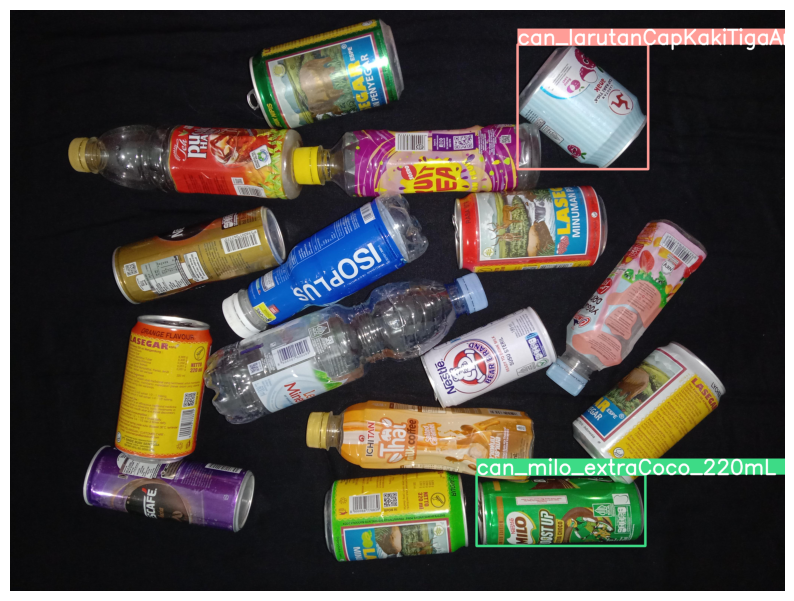

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pretrained YOLOv8n model
model = YOLO("runs/detect/train23/weights/best.pt")

# Define path to the image file
source = "datasets/multicontainer/test/images/IMG_20240909_151538_jpg.rf.3a8d80799662bec854b0a6884e9068ce.jpg"

# Run inference on the source
result = model(source)  # list of Results objects

# Get the image with bounding boxes using the plot method
image_with_boxes = result[0].plot()

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 25))

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()
